In [1]:
import pandas as pd
import numpy as np

Part 1: Plotting the data

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
def plotData(X: np.array, y: np.array) -> None:
    pos = X[y==1,:]
    neg = X[y==0,:]
    plt.scatter(pos[:,0],pos[:,1],marker='+')
    plt.scatter(neg[:,0],neg[:,1],marker='o')

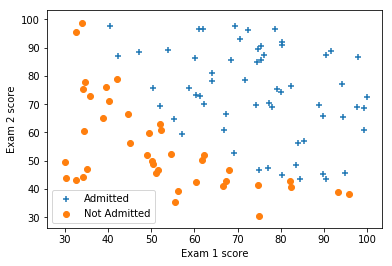

In [17]:
data = pd.read_csv('ex2Data1.txt',header=None) 
X = data.iloc[:,:2].values
y = data.iloc[:,2].values
m = len(y)
plotData(X,y)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(['Admitted','Not Admitted'])

Part 2: Compute Cost and Gradient

In [18]:
def sigmoid(x: np.array) -> np.array:
    return 1/(1+np.exp(-x))

In [39]:
def costFunction(theta: np.array, X: np.array, y: np.array) -> (float, np.array):
    m = len(y)
    h = sigmoid(X.dot(theta))
    log_h = np.log(h)
    log_1_h = np.log(1-h)
    J = 1/m *(-y.T.dot(log_h) - (1-y).T.dot(log_1_h))
    grad = 1/m * X.T.dot(h - y)
    return J, grad

def costOnly(theta: np.array, X: np.array, y: np.array) -> float:
    m = len(y)
    h = sigmoid(X.dot(theta))
    log_h = np.log(h)
    log_1_h = np.log(1-h)
    J = 1/m *(-y.T.dot(log_h) - (1-y).T.dot(log_1_h))
    return J

def gradientOnly(theta: np.array, X: np.array, y: np.array) ->  np.array:
    m = len(y)
    h = sigmoid(X.dot(theta))
    log_h = np.log(h)
    log_1_h = np.log(1-h)
    grad = 1/m * X.T.dot(h - y)
    return grad



In [40]:
X = np.c_[np.ones(m),data.iloc[:,:2].values]
m, n = np.shape(X)
initial_theta = np.zeros(n)
cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros):');
print('{}'.format(grad));
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');


Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [41]:
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y);

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n');
print('Gradient at test theta (zeros):');
print('{}'.format(grad));
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');


Cost at initial theta (zeros): 0.218
Expected cost (approx): 0.218

Gradient at test theta (zeros):
[ 0.04290299  2.56623412  2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647



Part 3: Optimizing to find Minimum

In [43]:
import scipy.optimize as op
result = op.minimize(fun = costOnly,x0 = initial_theta, args = (X, y), method = 'TNC', jac = gradientOnly)

In [46]:
print('Cost at theta found with scipy and TNC method:{:.3d}',format(result.fun))
print('Expected cost (approx): 0.203\n')
print('theta: \n')
print('{}'.format(result.x));
print('Expected theta (approx):\n');
print(' -25.161\n 0.206\n 0.201\n');

Cost at theta found with scipy and TNC method:{:.3d} 0.20349770158947486
Expected cost (approx): 0.203

theta: 

[-25.16131856   0.20623159   0.20147149]
Expected theta (approx):

 -25.161
 0.206
 0.201



In [51]:
def plotDecisionBoundary(theta: np.array, X: np.array, y: np.array) -> None:
    plotData(X[:,1:3],y)
    m,n = np.shape(X)
    plot_X = np.array([min(X[:,2]),max(X[:,2])])
    plot_y = -1/theta[2]*(theta[1]*plot_X + theta[0])
    plt.plot(plot_X,plot_y)
    plt.legend([ 'Decision Boundary','Non admitted','Admitted'])

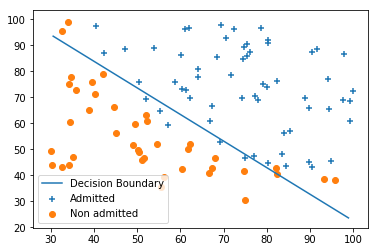

In [52]:
plotDecisionBoundary(theta, X, y)

Part 4: Predict and Accuracies

In [58]:
prob = sigmoid(np.array([1, 45, 85]).T.dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of {:.3f}'.format( prob));
print('Expected value: 0.775 +/- 0.002\n\n');

For a student with scores 45 and 85, we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002




In [66]:
def predict(theta: np.array, X: np.array) -> np.array:
    return np.int32(sigmoid(X.dot(theta)) >= 0.5)

In [74]:
p = predict(theta, X)
print('Train Accuracy: {:.1f}\n'.format(np.mean(np.float32(p == y)) * 100))
print('Expected accuracy (approx): 89.0\n');
print('\n');

Train Accuracy: 89.0

Expected accuracy (approx): 89.0



